In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
def kernel(x, loc):
    return 0.5*np.exp(-(25*(x - loc))**2)

def rust_k_circ(ts, vs):
    with open("temp.csv" , mode= "w") as f:
        wtr = csv.writer(f)

        wtr.writerow(ts)
        wtr.writerow(vs)

    rust_path = "~/Documents/HML/cleaning/ABM/fp/ripleys_k/target/release/ripleys_k"
    current_path = os.getcwd()
    
    os.system(f"{rust_path} {current_path}/temp.csv {current_path}/temp_out.csv 1")

    with open("temp_out.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out = [float(a) for a in v]
            break
    
    os.system(f"rm {current_path}/temp.csv")
    os.system(f"rm {current_path}/temp_out.csv")
    return out

In [10]:
dir_to_get = "sp/output/"
run_len = len(os.listdir(dir_to_get))
shrimp = []
fish = []
for i in range(run_len):
    out = []
    with open(dir_to_get+f"{i}.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out.append([float(a) for a in v])
        shrimp.append(out[0])
        fish.append(out[1])

Text(0.5, 1.0, '118')

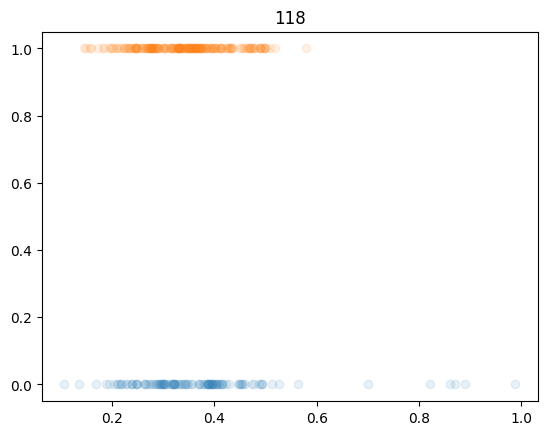

In [11]:
t = -1
plt.scatter(shrimp[t],np.zeros_like(shrimp[t]), alpha=0.1)
plt.scatter(fish[t],np.zeros_like(fish[t])+1, alpha=0.1)
plt.title(len(shrimp[t]))

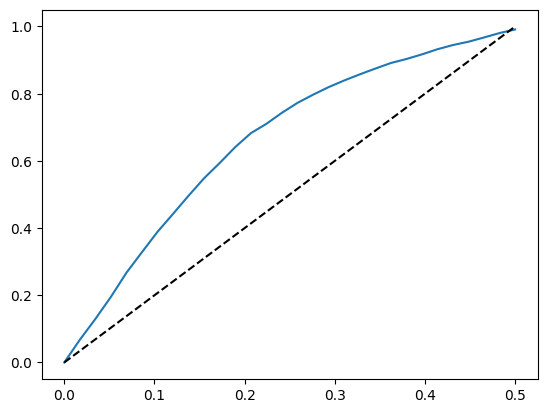

In [198]:
ts = np.linspace(0,0.5,30)
ks = rust_k_circ(ts,shrimp[-1])
plt.plot(ts,ks)
plt.plot(ts,2*ts, color="black", linestyle="dashed")

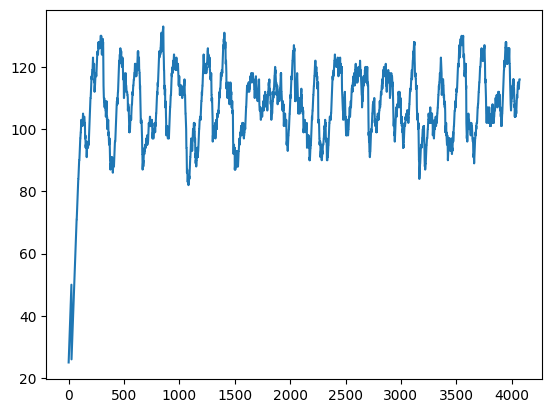

In [162]:
plt.plot([len(x) for x in shrimp])